**1.앙상블 학습, Random Forest, GBM (45점)**

1-Q1. 앙상블 학습의 전통적인 유형 세 가지는 무엇인가요?(2점)

정답: 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)

1-Q2. 다음 서술이 참인지 거짓인지 판단하세요.(3점)

: 배깅(Bagging) 방식은 서로 다른 알고리즘을 가진 분류기를 결합하여 최종 결정을 도출하는 방식이다.

정답: 거짓; 동일한 알고리즘을 서로 다른 샘플 데이터셋에 적용해 최종 결정을 도출하는 방식이다. (주어진 설명은 '보팅' 방식에 대한 서술)

1-Q3. 다음은 실습에 필요한 라이브러리 및 데이터 전처리 과정입니다. 그대로 Run 해주세요.(3점)
######(이번 복습과제는 아래의 데이터 셋만 사용합니다. 앙상블, 랜덤포레스트, GBM까지 새롭게 데이터를 로드하실 필요는 없습니다)

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bitamin_Homework/Week_4/diabetes.csv')

X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

1-Q4일반적으로 보팅 방식 중 소프트 보팅이 하드 보팅보다 성능이 좋아 많이 사용됩니다.

다음 실습을 통해 하드 보팅과 소프트 보팅의 정확도를 비교해보고, 앙상블 방식이 아닌 개별 분류기의 예측 성능 또한 출력해서 비교해보겠습니다.(5점)

사용할 개별 분류기:
1. 로지스틱 회귀
2. K 최근접 이웃
3. 랜덤 포레스트

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 성능 평가 함수
def get_clf_eval(y_test, pred=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [ ]:
# 개별 모델 생성
# 로지스틱 회귀의 solver='liblinear' 설정
# K 최근접 이웃의 n_neighbors=8 설정
# 랜덤포레스트의 random_state=11 고정

lr = LogisticRegression(solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=8)
rf = RandomForestClassifier(random_state=11)

# 데이터 세트 분리
# test_size=0.2, random_state=11로 설정해줍니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# 하드 보팅 기반의 앙상블 모델로 구현한 분류기 생성
vo_hard = VotingClassifier(estimators=[('LR', lr), ('KNN', knn), ('RF', rf)], voting='hard')

# Hard Voting Classifier 학습/예측/평가
# 평가는 get_clf_eval로 출력해주세요
vo_hard.fit(X_train, y_train)
pred_h = vo_hard.predict(X_test)
print('하드 보팅')
get_clf_eval(y_test, pred_h)

# 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 생성
vo_soft = VotingClassifier(estimators=[('LR', lr), ('KNN', knn), ('RF', rf)], voting='soft')

# Soft Voting Classifier 학습/예측/평가
# 평가는 get_clf_eval로 출력해주세요
vo_soft.fit(X_train, y_train)
pred_s = vo_soft.predict(X_test)
print('소프트 보팅')
get_clf_eval(y_test, pred_s)

하드 보팅
오차 행렬
[[90 10]
 [29 25]]
정확도: 0.7468, 정밀도: 0.7143, 재현율: 0.4630
소프트 보팅
오차 행렬
[[86 14]
 [26 28]]
정확도: 0.7403, 정밀도: 0.6667, 재현율: 0.5185


In [ ]:
# 개별 모델의 학습/예측/평가 (for문 사용)
# 세 가지 분류기를 리스트 형태로 저장
classifiers = [lr, knn, rf]

# for문을 사용하여 분류기 이름과 해당 분류기를 사용했을 때의 get_clf_eval 출력
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print(class_name)
  get_clf_eval(y_test, pred)

LogisticRegression
오차 행렬
[[90 10]
 [31 23]]
정확도: 0.7338, 정밀도: 0.6970, 재현율: 0.4259
KNeighborsClassifier
오차 행렬
[[88 12]
 [31 23]]
정확도: 0.7208, 정밀도: 0.6571, 재현율: 0.4259
RandomForestClassifier
오차 행렬
[[85 15]
 [28 26]]
정확도: 0.7208, 정밀도: 0.6341, 재현율: 0.4815


1-Q5. 하드 보팅 방식의 경우 예측 결과값을 다수결로 투표하여 최종값을 결정하므로 predict_proba를 구하거나 임계값을 조절할 수 없습니다.
######(6점)

소프트 보팅 방식을 사용하여 임계값을 달리하며 정확도, 정밀도, 재현율을 출력해보세요.(임계값은 0부터 1까지 0.1씩 증가하도록 해주세요.)

In [ ]:
from sklearn.preprocessing import Binarizer

# 0부터 1까지 0.1 step으로 하는 리스트를 생성하여 custom_thresholds에 저장
custom_thresholds = list(np.arange(0, 1.1, 0.1))

# 소프트 보팅의 positive에 대한 예측 확률을 pred_proba_c1에 저장한 후 2차원 배열로 변환
pred_proba_c1 = vo_soft.predict_proba(X_test)[:, 1]
pred_proba_c1 = pred_proba_c1.reshape(-1, 1)

# for문을 이용하여 임계값에 따른 get_clf_eval결과 출력
for custom_threshold in custom_thresholds:
  binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
  custom_predict = binarizer.transform(pred_proba_c1)
  print('threshold={0:.1f}'.format(custom_threshold))
  get_clf_eval(y_test, custom_predict)

threshold=0.0
오차 행렬
[[  0 100]
 [  0  54]]
정확도: 0.3506, 정밀도: 0.3506, 재현율: 1.0000
threshold=0.1
오차 행렬
[[23 77]
 [ 2 52]]
정확도: 0.4870, 정밀도: 0.4031, 재현율: 0.9630
threshold=0.2
오차 행렬
[[54 46]
 [ 4 50]]
정확도: 0.6753, 정밀도: 0.5208, 재현율: 0.9259
threshold=0.3
오차 행렬
[[72 28]
 [13 41]]
정확도: 0.7338, 정밀도: 0.5942, 재현율: 0.7593
threshold=0.4
오차 행렬
[[82 18]
 [23 31]]
정확도: 0.7338, 정밀도: 0.6327, 재현율: 0.5741
threshold=0.5
오차 행렬
[[86 14]
 [26 28]]
정확도: 0.7403, 정밀도: 0.6667, 재현율: 0.5185
threshold=0.6
오차 행렬
[[93  7]
 [33 21]]
정확도: 0.7403, 정밀도: 0.7500, 재현율: 0.3889
threshold=0.7
오차 행렬
[[100   0]
 [ 42  12]]
정확도: 0.7273, 정밀도: 1.0000, 재현율: 0.2222
threshold=0.8
오차 행렬
[[100   0]
 [ 50   4]]
정확도: 0.6753, 정밀도: 1.0000, 재현율: 0.0741
threshold=0.9
오차 행렬
[[100   0]
 [ 54   0]]
정확도: 0.6494, 정밀도: 0.0000, 재현율: 0.0000
threshold=1.0
오차 행렬
[[100   0]
 [ 54   0]]
정확도: 0.6494, 정밀도: 0.0000, 재현율: 0.0000


1-Q6) 앞서 앙상블 문제에서 활용한 X,y를 train_test_split을 이용하여 train,test 데이터로 분류해주세요.(단, test_size = 0.2 , random_state =0으로 지정)(2점)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

아래의 코드를 실행시켜 주세요.

In [ ]:
rf_clf = RandomForestClassifier(random_state=0)

rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test,pred)

print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도 : 0.7857


1-Q7) 위의 코드에서 랜덤 포레스트 객체 생성시 파라미터를 추가해 정확도를 개선해주세요. <br/>(단, random_state =0는 고정)(8점)

In [ ]:
# RandomForestClassifier 객체를 생성
rf_clf = RandomForestClassifier(random_state=0,max_depth=8,n_estimators=100,min_samples_leaf=10)

# rf_clf를 이용하여 랜덤 포레스트 학습 및 예측 성능을 평가
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)

# 정확도를 accuracy변수에 저장
accuracy = accuracy_score(y_test,pred)

print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도 : 0.8312


앙상블 문제에서 사용한 X,y를 train_test_split() 함수로 학습 데이터와 테스트 데이터로 분류하세요.

In [ ]:
# X_features와 y_label을 test_size = 0.2로 분리하고 random_state는 156으로 지정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

1-Q8. 데이터셋을 Adaboost으로 학습하여 정확도와 수행 시간을 측정하세요.(8점)

- 수행 시간 계산을 위해서는 time 모듈을 활용하고 소수점 4번째 자리에서 반올림하세요.
- n_estimators=50, learning_rate=1로 지정합니다.

In [ ]:
# 시작 시간 설정
start_time = time.time()

# Adaboost 학습 및 예측
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
abc.fit(X_train, y_train)
pred = abc.predict(X_test)

# Adaboost 정확도와 수행시간 출력
print('Adaboost 정확도:', accuracy_score(y_test, pred))
print('Adaboost 수행 시간: {0:.3f}초'.format(time.time() - start_time))


Adaboost 정확도: 0.7402597402597403
Adaboost 수행 시간: 0.123초


1-Q9. 데이터를 GBM으로 학습하여 정확도와 GBM 수행 시간을 측정하세요.(8점)
- 모든 수치는 소수점 4번째 자리에서 반올림하여 출력하세요.

In [ ]:
from sklearn.model_selection import GridSearchCV

# 시작 시간 설정
start_time = time.time()

# GBM 학습 및 예측
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

# n_estimators 와 learning_rate는 각각 자유롭게 2개씩 설정하여 params 변수에 딕셔너리 형태로 지정하세요.
params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05, 0.1]
}

# GridSearchCV를 적용하여 하이퍼 파라미터를 최적화해봅니다.
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)

# GMB 최적 하이퍼 파라미터, 최고 예측 정확도와 수행시간을 순서대로 출력하세요.
print('GBM 최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('GBM 최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
print('GBM 수행 시간: {0:.3f}초'.format(time.time() - start_time))

# 최적으로 학습된 estimator로 예측 수행하고 정확도를 출력하세요.
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))


Fitting 2 folds for each of 4 candidates, totalling 8 fits
GBM 최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 100}
GBM 최고 예측 정확도: 0.7573
GBM 수행 시간: 3.546초
GBM 정확도: 0.7662


**2.XGBoost, RightGBM (55점)**

아래 데이터를 로드해주세요

In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import plot_importance
import numpy as np
from sklearn. model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

diabetes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bitamin_Homework/Week_4/diabetes.csv')

features = diabetes.iloc[:,:-1]
label = diabetes.iloc[:,-1]

2-Q1. 파이썬 래퍼 XGBoost로 학습하여 나온 예측 확률 값과 예측값을 10개씩 출력하세요.(10점)

In [ ]:
# X_features와 y_label을 test_size = 0.2로 분리하고, tarin 데이터에서 10%는 검증용으로 분리하기
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 156)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 156)

# DMatrix 생성
dtr = xgb.DMatrix(data = X_tr, label = y_tr)
dval = xgb.DMatrix(data = X_val, label = y_val)
dtest = xgb.DMatrix(data = X_test, label = y_test)

# 파라미터 지정
params = {'max_depth':3, 'eta':0.05, 'objective':'binary:logistic', 'eval_metric':'logloss'}

# XGBoost를 이용하여 학습(부스팅 반복 횟수는 300회, 조기 중단 최소 반복 횟수는 50회)
xgb_model = xgb.train(params = params, dtrain = dtr, num_boost_round = 300, early_stopping_rounds = 50, evals = [(dtr,'train'),(dval,'eval')])

# XGBoost로 학습하여 나온 예측 확률 값과 예측값을 출력
pred_probs = xgb_model.predict(dtest)
print("예측 확률 값 :", np.round(pred_probs[:10],4))
preds = [1 if x >= 0.5 else 0 for x in pred_probs]
print("예측 값 :", preds[:10])


[0]	train-logloss:0.67424	eval-logloss:0.68132
[1]	train-logloss:0.65707	eval-logloss:0.67134
[2]	train-logloss:0.64089	eval-logloss:0.66087
[3]	train-logloss:0.62639	eval-logloss:0.65128
[4]	train-logloss:0.61263	eval-logloss:0.64417
[5]	train-logloss:0.59867	eval-logloss:0.63634
[6]	train-logloss:0.58585	eval-logloss:0.62944
[7]	train-logloss:0.57412	eval-logloss:0.62167
[8]	train-logloss:0.56307	eval-logloss:0.61589
[9]	train-logloss:0.55373	eval-logloss:0.61184
[10]	train-logloss:0.54423	eval-logloss:0.60579
[11]	train-logloss:0.53526	eval-logloss:0.60138
[12]	train-logloss:0.52706	eval-logloss:0.59691
[13]	train-logloss:0.51983	eval-logloss:0.59438
[14]	train-logloss:0.51208	eval-logloss:0.59015
[15]	train-logloss:0.50491	eval-logloss:0.58639
[16]	train-logloss:0.49823	eval-logloss:0.58253
[17]	train-logloss:0.49174	eval-logloss:0.57811
[18]	train-logloss:0.48581	eval-logloss:0.57477
[19]	train-logloss:0.48006	eval-logloss:0.57031
[20]	train-logloss:0.47488	eval-logloss:0.56878
[2

2-Q2. 사이킷런 래퍼 XGBoost로 학습하여 나온 예측값을 10개 출력하세요.(파라미터는 Q1과 동일하게 설정해주세요.)

In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 300, learning_rate = 0.05, max_depth = 3, eval_metric = 'logloss')
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds = 50, eval_set = [(X_tr, y_tr),(X_val, y_val)], verbose = True)

xgb_preds = xgb_wrapper.predict(X_test)
print("예측 확률 값 :", np.round(xgb_preds[:10],4))


[0]	validation_0-logloss:0.67424	validation_1-logloss:0.68132
[1]	validation_0-logloss:0.65707	validation_1-logloss:0.67134
[2]	validation_0-logloss:0.64089	validation_1-logloss:0.66087
[3]	validation_0-logloss:0.62639	validation_1-logloss:0.65128
[4]	validation_0-logloss:0.61263	validation_1-logloss:0.64417
[5]	validation_0-logloss:0.59867	validation_1-logloss:0.63634
[6]	validation_0-logloss:0.58585	validation_1-logloss:0.62944
[7]	validation_0-logloss:0.57412	validation_1-logloss:0.62167
[8]	validation_0-logloss:0.56307	validation_1-logloss:0.61589
[9]	validation_0-logloss:0.55373	validation_1-logloss:0.61184
[10]	validation_0-logloss:0.54423	validation_1-logloss:0.60579
[11]	validation_0-logloss:0.53526	validation_1-logloss:0.60138
[12]	validation_0-logloss:0.52706	validation_1-logloss:0.59691
[13]	validation_0-logloss:0.51983	validation_1-logloss:0.59438
[14]	validation_0-logloss:0.51208	validation_1-logloss:0.59015
[15]	validation_0-logloss:0.50491	validation_1-logloss:0.58639
[1

지금 LightGBM의 버전이 책과 달라 오류가 발생합니다. 이를 방지하기위해 LightGBM의 버전을 3.3.2로 다운그레이드 하고 런타임을 재시작해주세요
######(이미 버전이 3.2.2라면 그대로 진행해주세요)

In [ ]:
pip install lightgbm==3.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.7 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.0.0
    Uninstalling lightgbm-4.0.0:
      Successfully uninstalled lightgbm-4.0.0


아래 코드를 실행해주세요

In [ ]:
from lightgbm import LGBMClassifier
from lightgbm import plot_metric, plot_tree

X_data = diabetes.iloc[:, :-1]
y_data = diabetes.iloc[:, -1]


X_train, X_test, y_train, y_test=train_test_split(X_data, y_data, test_size=0.3, random_state=156 )

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

lgbm_wrapper_of = LGBMClassifier(
                         n_estimators=300,
                         learning_rate=0.05,
                         random_state = 121)

evals = [(X_tr, y_tr),(X_val,y_val)]
lgbm_wrapper_of.fit(X_tr, y_tr, eval_metric="logloss", eval_set=evals, verbose=False )
preds_of = lgbm_wrapper_of.predict(X_test)
pred_proba_of = lgbm_wrapper_of.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)

    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test,preds_of,pred_proba_of)

오차행렬
[[116  31]
 [ 31  53]]
정확도: 0.7316, 정밀도: 0.6310, 재현율: 0.6310, F1: 0.6310, AUC:0.7100


위의 LightGBM은 수행 중 여러 파라미터를 빼먹어 과적합이 발생했습니다

###### 2-Q3.과적합이 발생했음을 시각적으로 보여주세요(5점)

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

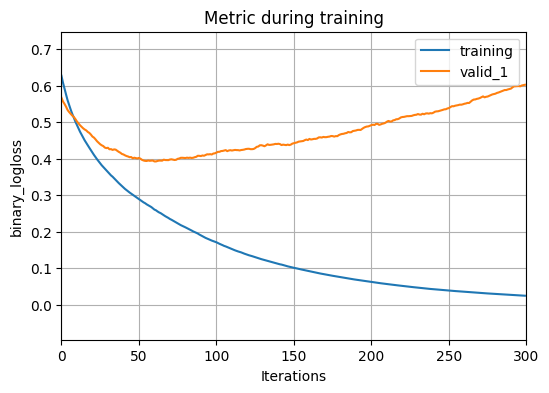

In [ ]:
plot_metric(lgbm_wrapper_of, figsize = (6,4))

<Axes: >

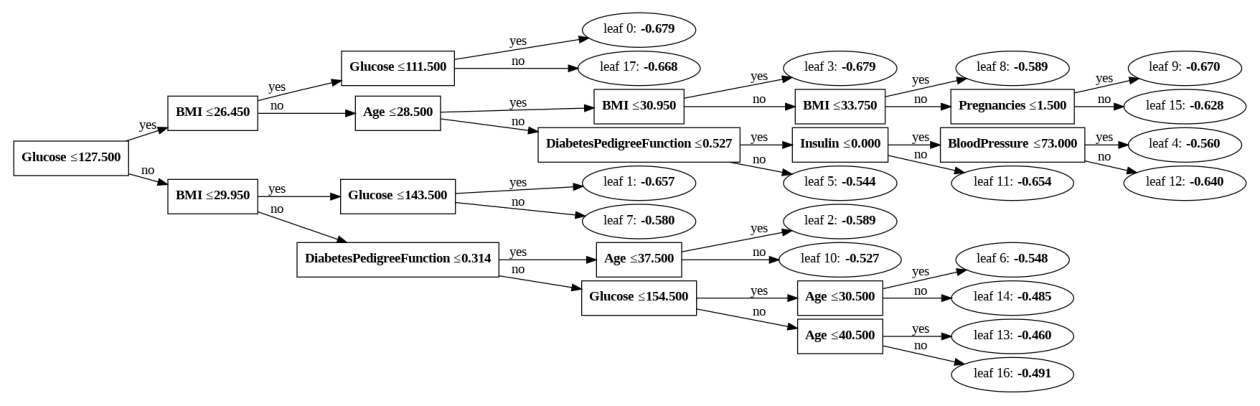

In [ ]:
plot_tree(lgbm_wrapper_of, figsize=(16,12))

###### plot_metric과 plot_tree를 확인했을때 iteration이 50번 반복할때 시점부터 logloss가 상승하는 것을 보이며 과적합이 발생했다고 판단
###### plot_tree가 깊고, 리프노드의 수도 17개로 많기 때문에 과적합이 발생했다고 판단

######2-Q4 위의 코드를 수정하여 정확도 2%P 이상 상승해 주세요
###### (단 n_estimatorssms 400, random_stat는 156으로 고정해주세요)(10점)

In [ ]:
lgbm_wrapper = LGBMClassifier(
                         n_estimators=400,
                         num_leaves=10,#하나의 트리가 가질 수 있는 최대 리프 개수
                         learning_rate=0.05,
                         min_child_samples=10,#최종 결정 클래인 리프 노드가 되기 위해서 최소한으로 필요한 레코드의 수
                         subsample=0.2, # 데이터를 샘플링하는 비율을 지정
                         colsample_bytree=0.8,#개별 트리를 학습할때마다 무작위로 학습하는 비율
                         max_depth = 10,#트리의 깊이를 지정
                         #reg_lambda = 0.3, #피처 개수가 많을때 이상치나, 아웃라이어를 잡아줌
                         #reg_alpha = 0.3,#데이터가 적을때 이를 잡아줌
                         random_state=156)



evals = [(X_tr, y_tr),(X_val,y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss", eval_set=evals, verbose=False)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

preds_val = lgbm_wrapper_of.predict(X_val)


In [ ]:
get_clf_eval(y_test,preds,pred_proba) # 이전보다 정확도가 약4%p가 상승

오차행렬
[[126  21]
 [ 31  53]]
정확도: 0.7749, 정밀도: 0.7162, 재현율: 0.6310, F1: 0.6709, AUC:0.7440


<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

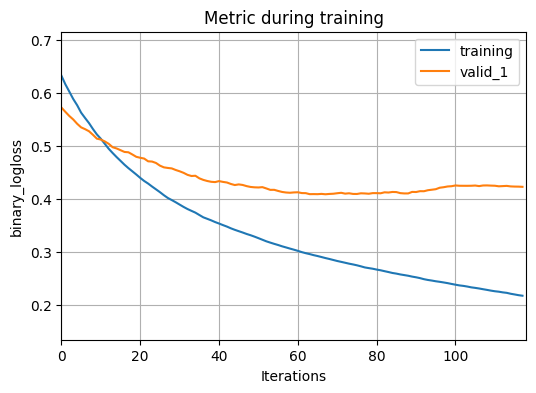

In [ ]:
plot_metric(lgbm_wrapper,figsize=(6,4)) # iterations이 50번 지점부터 깊게 낮아지지 않으므로 early_stopping_rounds가 과적합 방지에 주요한 역할을 함을 보임

<Axes: >

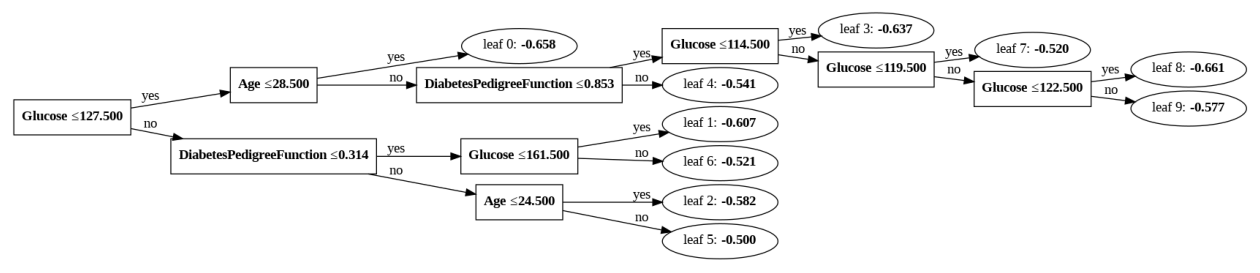

In [ ]:
plot_tree(lgbm_wrapper, figsize=(16,4)) # 리프 노드 역시 이전17개에서 10개로 낮아짐


###### 2-Q5번 GridSearchCV를 활용해 learnig_rate, max_depth, num_leaves, n_estimators의 최적 파라미터를 구하고 GridSeaechCV의 수행시간, 최고 정확도를 구하고 GridSearchCV가 XGBoosth, LightGBM에 적합하지 않는 이유를 말해주세요
###### cv = 3, refit=True로 고정해주세요(10점)

In [ ]:
from sklearn.model_selection import GridSearchCV
import time
start_time = time.time()
param_lgb = {"learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5],
             "max_depth" : [5, 10, 15],
             "num_leaves" : [3, 5, 7],
             'n_estimators':[100,200,300,400]
              }


gscv_lgb = GridSearchCV (estimator = lgbm_wrapper, param_grid = param_lgb, scoring ='accuracy', cv = 3, refit=True)
gscv_lgb.fit(X_tr, y_tr)

print('GridSearchCV 파라미터: ', gscv_lgb.best_params_)
print('GridSearchCV 예측 정확도: {:.4f}'.format(gscv_lgb.best_score_))
print('GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time() - start_time))

GridSearchCV 파라미터:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 400, 'num_leaves': 3}
GridSearchCV 예측 정확도: 0.7743
GridSearchCV 수행 시간: 53.0 초


###### 답:앙상블의 경우는 하이퍼 파라미터가 상대적으로 많기 때문에 튜닝해야할 하이퍼 파라미터가 많기 때문에

###### 2-Q6번 이제 실제로 해당 파라미터를 적용해 학습하고, 검증한뒤 get_clf_eval 함수를 사용해 실제 정확도를 도출해주세요
######도출된 정확도를 바탕으로 해석해주세요 (만약 정확도가 같다면 그대로 두고, 정확도가 다르다면 그 이유를 해석해 주세요)
###### (random_state는 모두 156으로 고정해 주세요)(10점)

In [ ]:
lgbm_wrapper_real = LGBMClassifier(
                         n_estimators=400,
                         num_leaves=3,#하나의 트리가 가질 수 있는 최대 리프 개수
                         learning_rate=0.01,
                         max_depth = 5,
                         random_state=156)



evals = [(X_tr, y_tr),(X_val,y_val)]
lgbm_wrapper_real.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss", eval_set=evals, verbose=False)
preds = lgbm_wrapper_real.predict(X_test)
pred_proba = lgbm_wrapper_real.predict_proba(X_test)[:, 1]


In [ ]:
get_clf_eval(y_test,preds,pred_proba) # 예측정확도 보다 실제 정확도가 낮게 나온다 즉 테스트 데이터와 검증용 데이터와의 차이때문이다.

###### 해석: 예측정확도 보다 실제 정확도가 낮게 나온다 즉 테스트 데이터와 검증용 데이터와의 데이터셋의 차이 때문이다.

# 실습3

## 파이썬 래퍼 XGBoost 와 사이킷런 래퍼 XGBoost

## 3-0. VotingClassifier 알고리즘의 두 주요 생성 인자는?¶


답: estimators, voting

## 유방암 데이터 보팅

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


### 로지스틱 회귀와 KNN을 기반으로 한 소프트 보팅 분류기를 생성하시오. (solver = liblinear, n_neighbors=8, random_state = 42)

In [3]:
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors = 8)
dt_clf = DecisionTreeClassifier(random_state = 42)

vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf), ('DT', dt_clf)], voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.3, random_state = 42)

### 보팅 분류기 학습/예측/평가 (fit, predict, accuracy_score 사용, 소숫점 4째짜리 까지 반올림 할 것)

In [4]:
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print(np.round(accuracy_score(y_test, pred),4))

0.9825


### 개별 모델 학습/예측/평가(for 반복문 사용)

In [5]:
classifiers = [lr_clf, knn_clf, dt_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    class_pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도: 0.9825
KNeighborsClassifier 정확도: 0.9825
DecisionTreeClassifier 정확도: 0.9825


## 3-0. GBM은 가중치 업데이트를 할 때 ()의 방법을 사용합니다. ()안에 들어갈 방법은?

답 : 경사하강법

## 3-1. 파이썬 래퍼 XGBoost– 위스콘신 유방암 예측

In [6]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


### 3-1-1. 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터로 추출하고, 만든 train 데이터를 다시 쪼개서 90%는 학습용 데이터, 10%는 검증용 데이터로 분리하세요 (random_state = 156)

In [7]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 컬럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size = 0.2, random_state = 156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
# 변수 명은 X_tr, X_val, y_tr, y_val로 할 것
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state = 156)

### 3-1-2. 만든 X_train, X_test, X_tr, X_val의 shape를 확인해주세요

In [8]:
print(X_train.shape , X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


### 3-1-3. 학습, 검증, 테스트용 DMatrix를 생성하세요

In [9]:
# 학습, 검증, 테스트용 DMatrix를 생성.
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test , label=y_test)

### 3-1-4. early_stopping_rounds의 값을 50으로 선정해서 모델이 정확하게 조기 중단하였는지 확인해주세요

In [10]:
params = { 'max_depth':3,
          'eta': 0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
         }
num_rounds = 400

# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval' 로 명기합니다.
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')] 만 명기해도 무방.

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds , early_stopping_rounds=50, evals=eval_list )

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52930
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31892	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

### 3-1-5. get_clf_eval() 함수를 이용해서 오차 행렬, 정확도, 정밀도, 재현율, F1 score, AUC score를 확인해주세요

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

pred_probs = xgb_model.predict(dtest)
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [12]:
# get_clf_eval() 함수 사용
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9937


### 3-1-6. plot_importance() 함수로 Feature importance를 확인해주세요

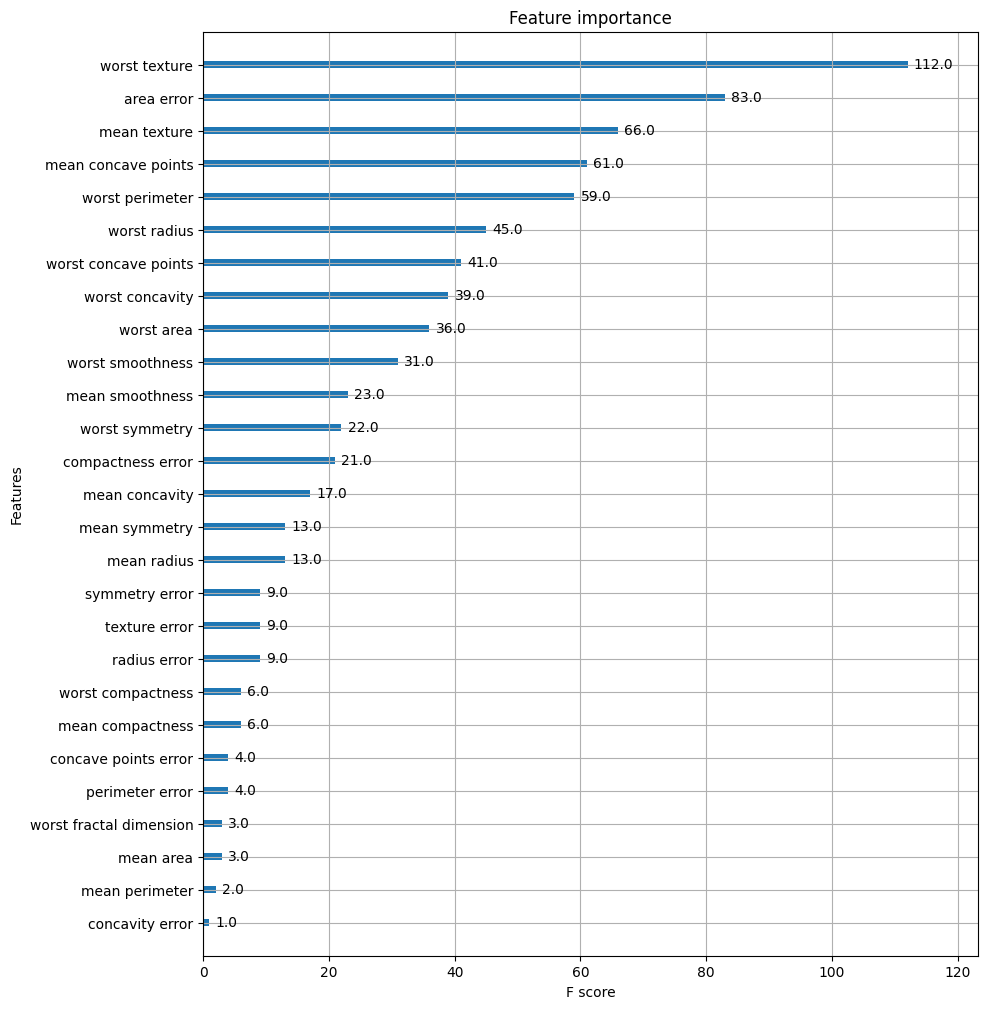

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot_importance() 함수 사용
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)
plt.show()

## 3-2. 사이킷런 래퍼 XGBoost 적용 (파라미터명의 변화를 주의해주세요)

### 3-2-1. early_stopping_rounds의 값을 100 -> 10으로 설정하면서 get_clf_eval() 함수를 이용해 정확도 값의 변화를 확인해주세요

In [14]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds= 100, eval_metric="logloss", eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

In [15]:
# get_clf_eval() 함수로 정확도 확인
get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


In [16]:
# early_stopping_rounds를 10으로 설정하고 재 학습.
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds= 10 , eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

## 3-4. 랜덤 포레스트

#### 3-4-1. GridSearchCV를 이용해 최적의 하이퍼파라미터를 찾고 최고 예측 정확도를 출력하세요. (max_leaf_nodes 값 : 2~20, min_samples_split 값 : 2,3,4)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 21)), 'min_samples_split': [2, 3, 4]}

# RandomForestClassifier 객체 생성 (n_estimators=10, random_state=0 으로 설정)
rf_clf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)

# GridSearchCV 수행 (cv=3 으로 설정)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=3, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_leaf_nodes': 11, 'min_samples_split': 3}
최고 예측 정확도: 0.9627


#### 3-4-2. 최적의 하이퍼파라미터로 랜덤 포레스트를 다시 학습시키고, OOB 샘플의 정확도를 출력하세요. (랜덤 포레스트 객체 생성 시 oob_score=True 로 설정해야 합니다.)

In [18]:
rf_clf = RandomForestClassifier(n_estimators=10, max_leaf_nodes=11, min_samples_split=3, random_state=0, oob_score=True)
rf_clf.fit(X_train , y_train)
print('OOB 샘플 정확도: {0:.4f}'.format(rf_clf.oob_score_))

OOB 샘플 정확도: 0.9297


#### 3-4-3. feature_importances 속성을 이용해서 가장 영향력 있는 상위 10개 속성의 중요도를 시각화 하세요.

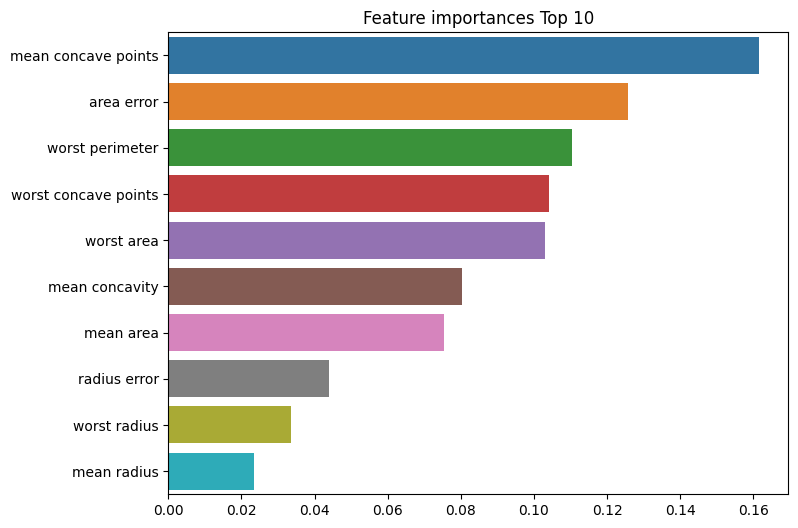

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 10')
sns.barplot(x=ftr_top10 , y = ftr_top10.index)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('rf_feature_importances_top20.tif', format='tif', dpi=300, bbox_inches='tight')

## 3-5 LightGBM

#### 3-5-1. n_estimators를 400으로 설정하여 객체를 생성하고,  XGBoost와 같은 시기에 조기 중단을 수행하도록 학습을 진행하세요.

In [20]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=True)

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

LGBMClassifier(learning_rate=0.05, n_estimators=400)

#### 3-5-2. LightGBM의 XGBoost 대비 장점을 서술하시오.

- 더 빠른 학습과 예측 수행 시간
- 더 작은 메모리 사용량
- 카테고리형 피처의 자동 변환과 최적 분할

#### 3-5-3. LightGBM의 트리 분할 방식을 서술하고, 해당 분할 방식을 사용하는 이유를 서술하시오.

- Leaf-wise(리프 중심 트리 분할)
- 학습을 반복할수록 균형 분할 트리보다 예측 오류 손실을 최소화할 수 있기 때문이다.

#### 3-5-4. 모델의 복잡도를 줄이는 기본 튜닝 방안이 무엇인지 서술하시오.

num_leaves의 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것

# 실습4. make_moons 데이터셋 분류

In [21]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=300, noise=0.4,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

## 4-1. 결정 트리와 랜덤 포레스트

#### 4-1-1. 결정트리의 하이퍼 파라미터를 모두 디폴트 값으로 설정해 학습시키고, 정확도를 출력하세요. (random_state=10)

In [22]:
from sklearn.tree import DecisionTreeClassifier

DTmodel = DecisionTreeClassifier(random_state=10)
DTmodel.fit(X_train, y_train)
pred = DTmodel.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정트리 정확도: {0:.4f}'.format(accuracy))

결정트리 정확도: 0.8000


#### 4-1-2. 다음은 분류기의 결정경계를 시각화하는 함수입니다. 셀을 실행시키고, 결정 트리의 결정경계를 시각화해주세요.

In [23]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

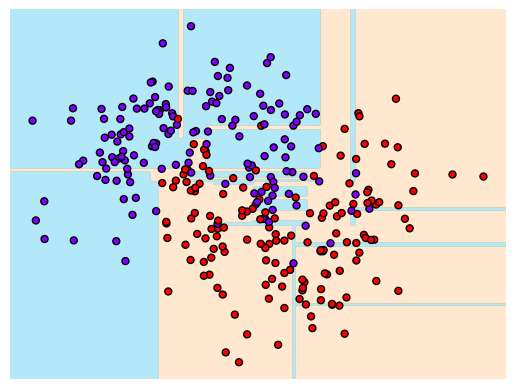

In [24]:
visualize_boundary(DTmodel, X, y)

#### 4-1-3. 100개의 결정트리를 갖는 랜덤포레스트 모델을 학습시키고, 결정경계를 시각화하세요.

In [25]:
rf_clf = RandomForestClassifier(n_estimators=100,random_state=0)
rf_clf.fit(X_train , y_train)

RandomForestClassifier(random_state=0)

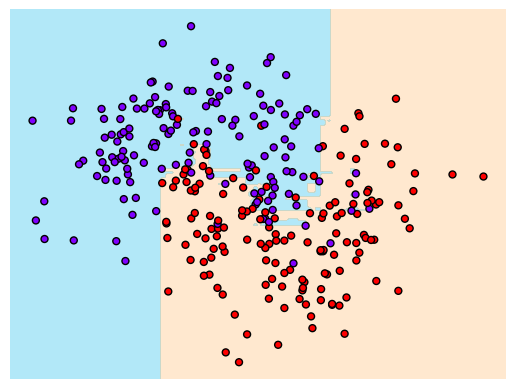

In [26]:
visualize_boundary(rf_clf, X, y)

#### 4-1-4. 결정트리와 랜덤포레스트의 결정경계를 비교하고, 이런 차이가 만들어지는 이유를 간단하게 설명하세요.

랜덤포레스트의 결정경계가 더 단순하다. (과적합 문제가 해결되었다.)   
배깅과 특성을 무작위로 선택하는 과정을 통해 트리들의 다양성이 커지기 때문이다.